In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import plot_model
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [4]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

labels: <br>

airplane 	- 0<br>									
automobile  - 1<br>								
bird 		- 2<br>								
cat 		- 3<br>								
deer 		- 4<br>								
dog 		- 5<br>								
frog 		- 6<br>								
horse 		- 7<br>								
ship 		- 8<br>								
truck       - 9<br>

In [6]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


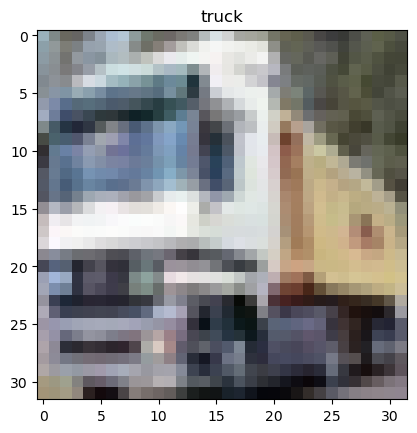

In [ ]:
plt.imshow(x_train[1])
plt.title(labels[y_train[1][0]])
plt.show()

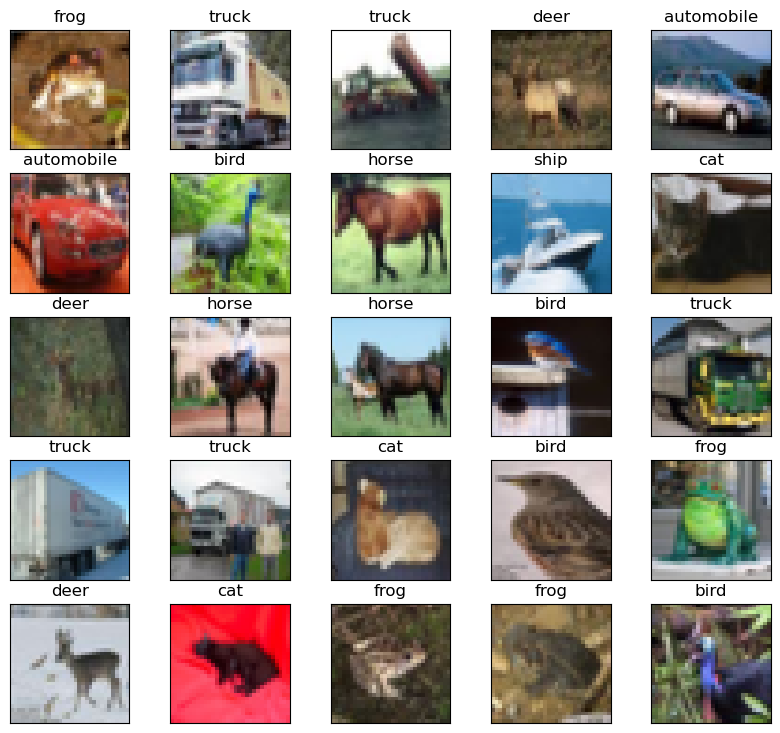

In [22]:
plt.figure(figsize=(10, 9))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])
    plt.xticks([]); plt.yticks([]);


In [24]:
# normalize
x_train = x_train/255
x_test = x_test/255

In [25]:
x_train.shape

(50000, 32, 32, 3)

In [26]:
# build model

model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,442 (1.28 MB)

 Trainable params: 334,442 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.4631 - loss: 1.4773 - val_accuracy: 0.5756 - val_loss: 1.1946
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5995 - loss: 1.1220 - val_accuracy: 0.6375 - val_loss: 1.0265
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6577 - loss: 0.9689 - val_accuracy: 0.6508 - val_loss: 0.9852
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6964 - loss: 0.8627 - val_accuracy: 0.6690 - val_loss: 0.9579
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7254 - loss: 0.7757 - val_accuracy: 0.6889 - val_loss: 0.9079
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7541 - loss: 0.6967 - val_accuracy: 0.6851 - val_loss: 0.9295
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7734 - loss: 0.6342 - val_accuracy: 0.6856 - val_loss: 0.9714
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7981 -

In [29]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6845 - loss: 1.0897


[1.0897260904312134, 0.684499979019165]

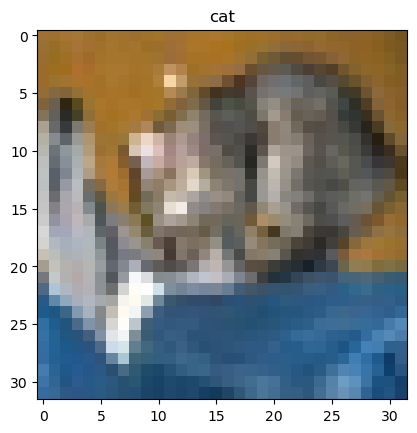

In [32]:
plt.imshow(x_test[0])
plt.title(labels[y_test[0][0]]);

In [37]:
new = x_test[0].reshape(1, 32, 32, 3)
res = np.argmax(model.predict(new, verbose=0))
pred = labels[res]
pred

'cat'

In [38]:
import cv2

In [63]:
def pred_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255
    img_1 = img.copy()
    img = cv2.resize(img, dsize=(32, 32))
    plt.subplot(121)
    plt.imshow(img_1)
    plt.title('original image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(img)
    plt.title('resized')
    plt.axis('off')
    img = img.reshape(1, 32, 32, 3)
    res = labels[np.argmax(model.predict(img, verbose=0))]
    print('prediction: ', res)

prediction:  dog


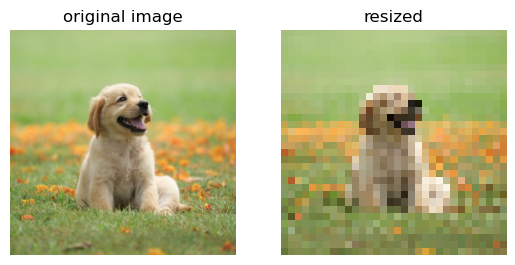

In [64]:
img = cv2.imread('../input/images/dog.jpg')
pred_img(img)

prediction:  dog


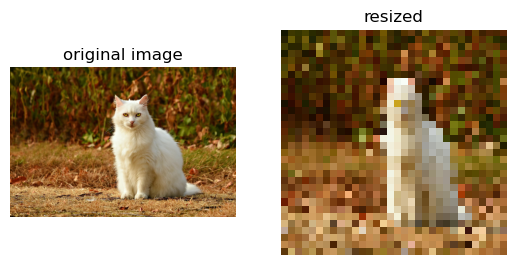

In [65]:
img = cv2.imread('../input/images/cat.jpg')
pred_img(img)

prediction:  horse


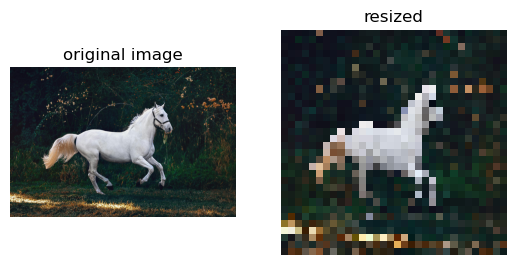

In [66]:
img = cv2.imread('../input/images/horse.jpg')
pred_img(img)